In [1]:
import math
import heapq
import matplotlib.pyplot as plt
import numpy as np
from typing import List, Tuple

Calculate the Euclidean distance between two points

In [2]:
def euclidean_distance(point1: Tuple[float, float], point2: Tuple[float, float]) -> float:
    x1, y1 = point1
    x2, y2 = point2                      
    return math.sqrt((x2 - x1) ** 2 + (y2 - y1) ** 2)

Calculate the weighted distance for a given point

In [3]:
def calculate_weighted_distance(point: Tuple[float, float], critical_value: float) -> float:
    return 1 / critical_value

Visualize the path on the matrix.

In [4]:
def visualize_path(matrix: List[List[float]], path: List[Tuple[int, int]], starting_point: Tuple[int, int]) -> None:

    matrix_np = np.array(matrix)
    fig, ax = plt.subplots()
    cax = ax.matshow(matrix_np, cmap='viridis', interpolation='nearest')
    fig.colorbar(cax)

    path_x, path_y = zip(*path)
    ax.plot(path_y, path_x, marker='o', color='r', linestyle='-', markersize=8)

    ax.set_xlabel('X-axis')
    ax.set_ylabel('Y-axis')
    ax.set_title('Path Visualization')

    plt.show()

In [5]:
def main(matrix: List[List[float]], starting_point: Tuple[int, int]) -> None:
    coordinates = []
    critical_values = {}
    for x in range(len(matrix)):
        for y in range(len(matrix[0])):
            if matrix[x][y] != 0:
                coordinates.append((x, y))
                critical_values[(x, y)] = matrix[x][y]

    seen = set()
    path = [starting_point]
    heap = [(0, starting_point)]

    while len(seen) < len(coordinates):
        _, current_point = heapq.heappop(heap)
        if current_point in seen:
            continue
        seen.add(current_point)

        for coord in coordinates:
            if coord not in seen:
                distance = euclidean_distance(current_point, coord)
                weighted_dist = distance * calculate_weighted_distance(coord, critical_values[coord])
                heapq.heappush(heap, (weighted_dist, coord))
                path.append(coord)

    print("Order of visited points:")
    for point in path:
        if point != starting_point:
            print(point)

    visualize_path(matrix, path, starting_point)

Example usage

Order of visited points:
(2, 6)
(2, 15)
(3, 2)
(3, 4)
(4, 8)
(5, 4)
(6, 10)
(7, 8)
(2, 6)
(2, 15)
(3, 4)
(4, 8)
(5, 4)
(6, 10)
(7, 8)
(2, 6)
(2, 15)
(3, 4)
(4, 8)
(6, 10)
(7, 8)
(2, 6)
(2, 15)
(4, 8)
(6, 10)
(7, 8)
(2, 6)
(2, 15)
(6, 10)
(7, 8)
(2, 6)
(6, 10)
(7, 8)
(2, 6)
(6, 10)
(6, 10)


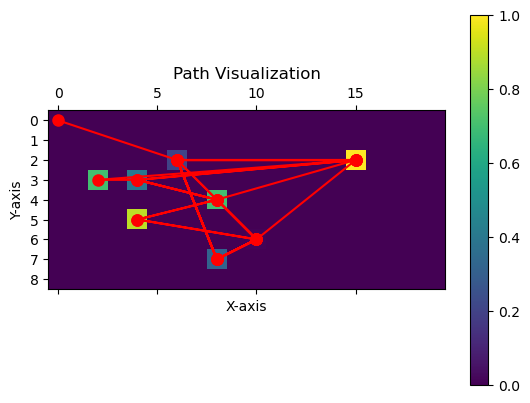

In [6]:
if __name__ == "__main__":
    matrix = [
        [0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
        [0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
        [0. , 0. , 0. , 0. , 0. , 0. , 0.2 , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 1. , 0. , 0. , 0. , 0. ],
        [0. , 0. , 0.7 , 0. , 0.4 , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
        [0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.7 , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
        [0. , 0. , 0. , 0. , 0.9 , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
        [0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.01, 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
        [0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.32, 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
        [0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ]
    ]
    starting_point = (0, 0)
    main(matrix, starting_point)